<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/ESAA_YB_%E1%84%86%E1%85%B5%E1%84%82%E1%85%B5%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 및 데이터

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname='/content/drive/MyDrive/malgun.ttf', # ttf 파일이 저장되어 있는 경로
    name='malgunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'malgunGothic'})

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
from google.colab import drive
drive.mount('/content/drive')
train=pd.read_csv("/content/drive/MyDrive/movies_train.csv")

Mounted at /content/drive


# 2. EDA

 - title : 영화의 제목
 - distributor : 배급사
 - genre : 장르
 - release_time : 개봉일
 - time : 상영시간
 - screening_rat : 상영등급
 - director : 감독이름
 - dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수( 단, 관객수가 알려지지 않은 영화 제외)
 - dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수.( 단, 관객수가 알려지지 않은 영화 제외)
 - num_staff : 스텝수
 - num_actor : 주연배우수
 - box_off_num : 관객수

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [6]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [7]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [8]:
print(train.shape)

(600, 12)


In [9]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


**<결측치 처리 및 전처리>**

In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

'dir_prev_bfnum'변수에만 330개의 결측치가 존재함.

In [11]:
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [12]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].value_counts()

0    330
Name: dir_prev_num, dtype: int64

'dir_prev_bfnum'이 결측치가 나타나는 경우에는 항상 'dir_prev_num'이 0이 됨.

즉, 감독이 이전에 제작한 영화가 없는 경우에, 이전에 제작한 영화의 평균 관객 수가 결측치로 나타나는 것이다.

-> 'dir_prev_bfnum'의 결측치를 모두 0으로 대체한다.

In [13]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

--------------------------------------------------------------------------

**[범주형 변수]**

**distributor**

In [14]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

**genre**

In [15]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

**release_time**

In [16]:
#'release_time'변수를 날짜 및 시간 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

#'release_time' 변수로 년도, 월 변수를 생성.
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

In [18]:
train['release_time'].describe()

<ipython-input-18-9e44aa3741ef>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train['release_time'].describe()


count                     600
unique                    330
top       2015-10-22 00:00:00
freq                        6
first     2010-01-02 00:00:00
last      2015-12-31 00:00:00
Name: release_time, dtype: object

**screening_rat**

In [19]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

**[연속형 변수]**

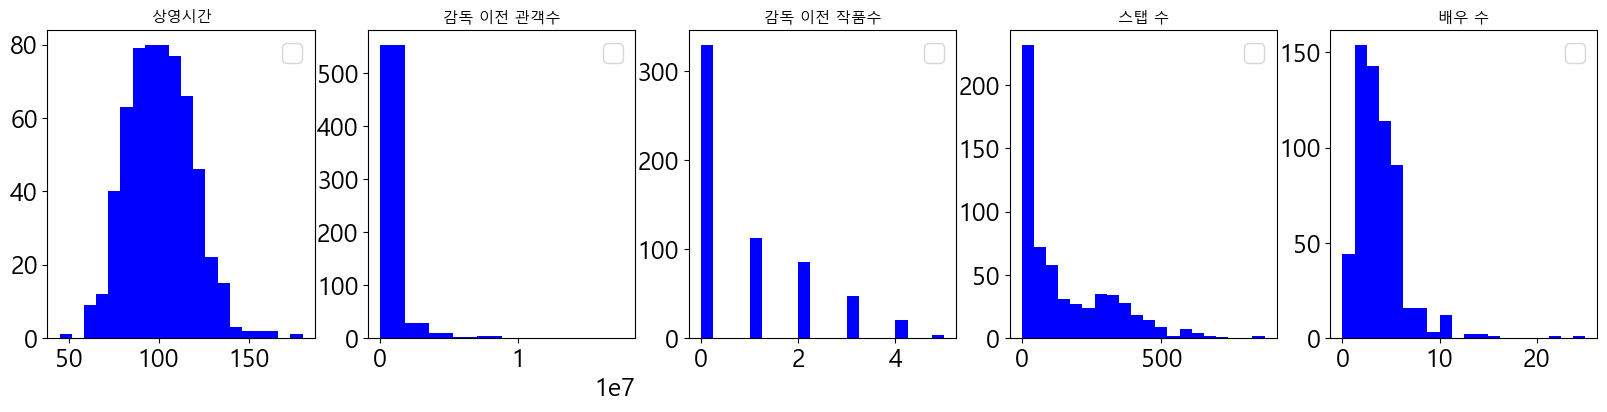

In [20]:
fig,axs = plt.subplots(1,5,figsize=(20,4))

axs[0].hist(train['time'], bins=20, color='blue')
axs[0].set_title('상영시간', fontsize=11, fontweight = 'bold')
axs[0].legend(loc = 'best')

axs[1].hist(train['dir_prev_bfnum'], bins=10, color='blue')
axs[1].set_title('감독 이전 관객수', fontsize=11, fontweight = 'bold')
axs[1].legend(loc = 'best')


axs[2].hist(train['dir_prev_num'], bins=20, color='blue')
axs[2].set_title('감독 이전 작품수', fontsize=11, fontweight = 'bold')
axs[2].legend(loc = 'best')

axs[3].hist(train['num_staff'], bins=20, color='blue')
axs[3].set_title('스탭 수', fontsize=11, fontweight = 'bold')
axs[3].legend(loc = 'best')

axs[4].hist(train['num_actor'], bins=20, color='blue')
axs[4].set_title('배우 수', fontsize=11, fontweight = 'bold')
axs[4].legend(loc = 'best')

plt.show()

# 1. 장르별 관객 점유율

: 'genre'변수별로 데이터를 분류하여, 장르별 관객수에 대한 내림차순으로 정리하였다.

In [21]:
train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64

<ipython-input-22-9b94bcd201eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby(['genre']).sum().plot(kind='pie', y='box_off_num', autopct='%.1f%%', startangle=200, counterclock=False,)


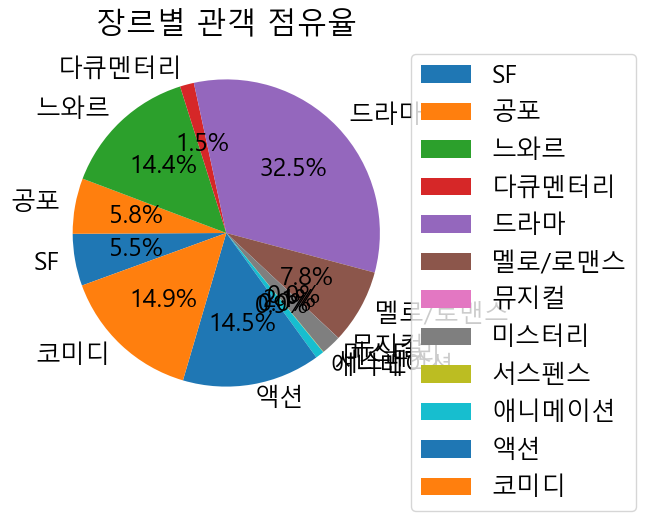

In [22]:
train.groupby(['genre']).sum().plot(kind='pie', y='box_off_num', autopct='%.1f%%', startangle=200, counterclock=False,)
plt.legend(bbox_to_anchor=(1.6,1))
plt.title('장르별 관객 점유율')
plt.ylabel('')

plt.gca().set_aspect('equal')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

장르별 관객수 점유율을 파이그래프로 나타내었다.

장르별 관객 점유율 중에서도 점유율이 높은 top5를 따로 그려보았다.

In [23]:
top5 = train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)[:5]
top5

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
Name: box_off_num, dtype: int64

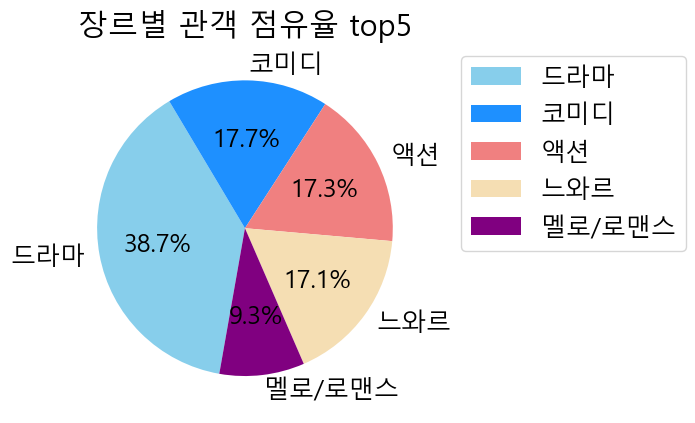

In [24]:
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['skyblue','dodgerblue','lightcoral','wheat','purple']
top5.plot(kind='pie', y='box_off_num', ylabel='', colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('장르별 관객 점유율 top5')
plt.legend(bbox_to_anchor=(1.05,1))

# 2. 계절별 많이 개봉하는 영화 장르

In [25]:
def season(x):
  if ((x>=3) & (x<=5)):
    return 'spring'
  elif ((x>=6) & (x<=8)):
    return 'summer'
  elif ((x>=9) & (x<=11)):
    return 'autumn'
  else:
    return 'winter'

train['season'] = train['month'].apply(season)
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11,autumn
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,autumn
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11,autumn
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211,2012,10,autumn
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526,2013,5,spring
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523,2012,10,autumn
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778,2014,9,autumn
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868,2012,3,spring


In [26]:
genre_spring = train.loc[train['season'] == 'spring',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_spring.columns = ['count']
genre_spring

,count
genre,
드라마,61
다큐멘터리,27
멜로/로맨스,26
코미디,11
느와르,8


In [27]:
genre_summer = train.loc[train['season'] == 'summer',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_summer.columns = ['count']
genre_summer

,count
genre,
드라마,36
공포,20
다큐멘터리,19
액션,11
멜로/로맨스,10


In [28]:
genre_autumn = train.loc[train['season'] == 'autumn',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_autumn.columns = ['count']
genre_autumn

,count
genre,
드라마,74
멜로/로맨스,29
다큐멘터리,27
코미디,17
공포,12


In [29]:
genre_winter = train.loc[train['season'] == 'winter',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_winter.columns = ['count']
genre_winter

,count
genre,
드라마,50
다큐멘터리,20
코미디,15
멜로/로맨스,13
느와르,8


<BarContainer object of 5 artists>

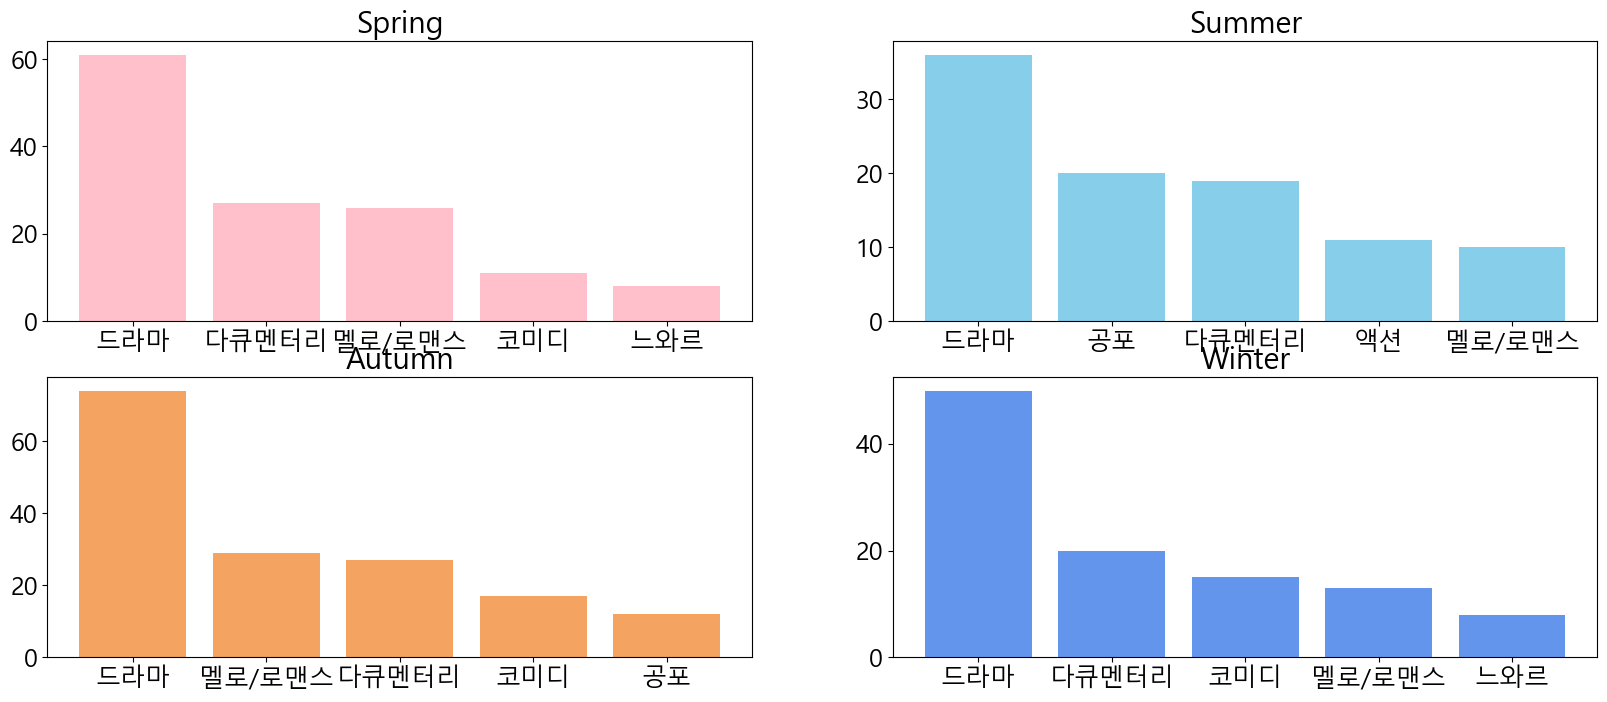

In [30]:
plt.rcParams['figure.figsize'] = [20, 8]

plt.subplot(2,2,1)
plt.title('Spring')
plt.bar(list(genre_spring.index), genre_spring['count'],color = 'pink')

plt.subplot(2,2,2)
plt.title('Summer')
plt.bar(list(genre_summer.index),genre_summer['count'],color = 'skyblue')

plt.subplot(2,2,3)
plt.title('Autumn')
plt.bar(list(genre_autumn.index),genre_autumn['count'], color = 'sandybrown')

plt.subplot(2,2,4)
plt.title('Winter')
plt.bar(list(genre_winter.index),genre_winter['count'],color = 'cornflowerblue')

## 3. 배급사 별 흥행성적 분석

In [31]:
# 배급사 종류 확인
distributor_types= train['distributor'].unique()
print(distributor_types)
# 배급사 개수 확인
print('\n배급사의 총 갯수: ',len(distributor_types))

['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '쇼박스(주)미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주) 케이알씨지' '(주)콘텐츠 윙' '(주)키노아이' '(주)팝 파트너스' 'CJ E&M 영화부문'
 '(주) 영화제작전원사' 'CJ E&M Pictures' 'CGV 무비꼴라쥬' '리틀빅픽처스' '스폰지' 'CJ 엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사 진진' '(주)레인보우 팩토리' '김기덕 필름' 'NEW' 'CJ CGV' '동국대학교 충무로영상제작센터'
 'BoXoo 엔터테인먼트' '(주)마운틴픽쳐스' 'CGV 아트하우스' '메가박스(주)플러스엠' '골든타이드픽처스' '파이오니아21'
 '디 씨드' '드림팩트 엔터테인먼트' '시너지' '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아'
 '(주)예지림 엔터테인먼트' '(주) 영화사조제' '보람엔터테인먼트' '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨'
 '(주)대명문화공장' '(주)온비즈넷' 'KT&G 상상마당' '무비꼴라쥬' '인벤트 디' '씨네그루(주)키다리이엔티'
 '스튜디오후크' '시네마 달' '나이너스엔터테인먼트(주)' 'THE 픽쳐스' '영구아트무비' '리틀빅픽쳐스' '어뮤즈'
 '이모션 픽처스' '(주)이스트스카이필름' '필라멘트 픽쳐스' '조이앤컨텐츠그룹' '타임스토리그룹' '마운틴 픽처스'
 '(주)휘엔터테인먼트' '이십세기폭스코리아(주)' '(주)피터팬픽쳐스' '에스와이코마드' '(주)더픽쳐스' '오퍼스픽쳐스'
 '(주)고앤고 필름' '사람과 사람들' '(주)JK필름' '씨너스엔터테인먼트(주)' 'KT' '싸이더스FNH' '(주)프레인글로벌'
 '나우콘텐츠' '홀리가든' '(주) 브릿지웍스' '(주)엣나인필름' '위더스필름' '시네마달' '(주)에이원 엔터테인먼트'
 'OAL(올)' '싸이더스' '전망좋

데이터에 포함된 배급사의 총 갯수와 종류는 다음과 같았다. 배급사 별 흥행성적을 분석하기에는 너무 많고, 인디 영화사나 영화를 한 두개정도 밖에 개봉시키지 못해 흥행성적 분석이 의미 없는 경우도 잦을 것이므로 영향력있는 상위 배급사만 분석 대상으로 삼겠다.

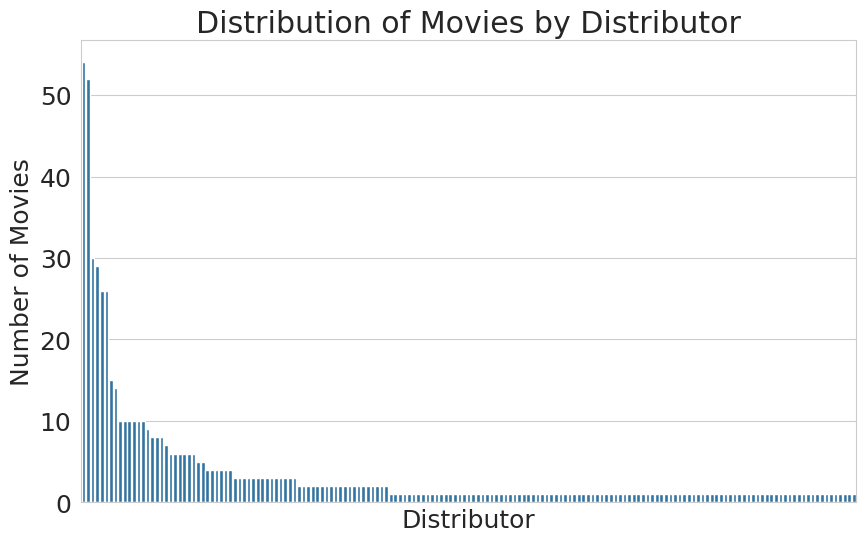

In [32]:
# 배급사 별 개봉 영화 수 시각화
movie_counts_by_distributor = train.groupby('distributor').size()

# 그래프 스타일 설정
sns.set_style("whitegrid")

# 배급사 별 영화 개수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='distributor', order=train['distributor'].value_counts().index)
plt.xticks([])  # x축 눈금 라벨 표시 X
plt.title('Distribution of Movies by Distributor')
plt.xlabel('Distributor')
plt.ylabel('Number of Movies')
plt.show()

개봉시킨 영화의 수를 y축으로 하여 분포를 그려봄으로써 영향력 있는 영화사의 수를 추론해보았다. 30개 이상의 영화를 개봉시킨 영화사가 2개 있고 그 뒤로 20개 이상정도로 감소하며, 그 이후로 다시 한 차례 10개 이상정도로 감소하는 것을 알 수 있으므로 영향력있는 영화사를 15개 이상 영화를 개봉시킨 영화사로 한정해서 알아보도록 하자.

In [33]:
# 배급사 별 영화 개수 세기
movie_counts_by_distributor = train.groupby('distributor').size()

# 15개 이상의 영화를 개봉시킨 배급사만 선택
distributors_with_15_or_more_movies = movie_counts_by_distributor[movie_counts_by_distributor >= 15]

# 결과 출력
print('15개 이상의 영화를 개봉시킨 배급사와 그에따른 영화수 :\n',distributors_with_15_or_more_movies)
print(type(distributors_with_15_or_more_movies))
print("15개 이상의 영화를 개봉시킨 배급사의 수: ",distributors_with_15_or_more_movies.count())

15개 이상의 영화를 개봉시킨 배급사와 그에따른 영화수 :
 distributor
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
CJ 엔터테인먼트    54
골든타이드픽처스     15
롯데엔터테인먼트     52
인디스토리        26
dtype: int64
<class 'pandas.core.series.Series'>
15개 이상의 영화를 개봉시킨 배급사의 수:  7


15개 이상의 영화를 개봉시킨 배급사의 수와 그 종류를 알 수 있었다. 이들의 흥행성적을 분석해보자.

In [34]:
# 상위 7개 배급사의 평균 흥행 성적 알아보기
# 상위 7개 배급사 선택
top_distributors = distributors_with_15_or_more_movies.index[:7]

# 선택된 배급사들의 영화들의 흥행 성적 총합과 영화 개수 계산
total_box_off_num = 0
total_movie_count = 0

for distributor in top_distributors:
    # 선택된 배급사의 영화들 필터링
    distributor_movies = train[train['distributor'] == distributor]

    # 선택된 배급사의 영화들의 흥행 성적 총합 계산
    total_box_off_num += distributor_movies['box_off_num'].sum()

    # 선택된 배급사의 영화 개수 계산
    total_movie_count += distributor_movies.shape[0]

# 평균 흥행 성적 계산
average_box_off_num = total_box_off_num / total_movie_count

print("상위 7개 배급사의 평균 흥행 성적:", average_box_off_num)

상위 7개 배급사의 평균 흥행 성적: 1447827.7758620689


In [35]:
# 상위 7개 배급사 선택
top_distributors = distributors_with_15_or_more_movies.index[:7]

# 선택된 배급사들의 평균 흥행 성적 계산
average_box_off_nums = {}

for distributor in top_distributors:
    # 선택된 배급사의 영화들 필터링
    distributor_movies = train[train['distributor'] == distributor]

    # 선택된 배급사의 영화들의 평균 흥행 성적 계산
    average_box_off_num = distributor_movies['box_off_num'].mean()

    # 결과 저장
    average_box_off_nums[distributor] = average_box_off_num

# 결과 출력
for distributor, average_box_off_num in average_box_off_nums.items():
    print(f"{distributor}: {average_box_off_num}")

(주)NEW: 2184404.8333333335
(주)마운틴픽쳐스: 32342.206896551725
(주)쇼박스: 3386656.3076923075
CJ 엔터테인먼트: 2162742.462962963
골든타이드픽처스: 4373.2
롯데엔터테인먼트: 1238148.9423076923
인디스토리: 5210.576923076923


영화를 개봉시킨 갯수 순으로 상위 7개의 영화사를 뽑아냈지만, 영화사 간의 흥행 성적 차이가 심한 것을 알 수 있었다.

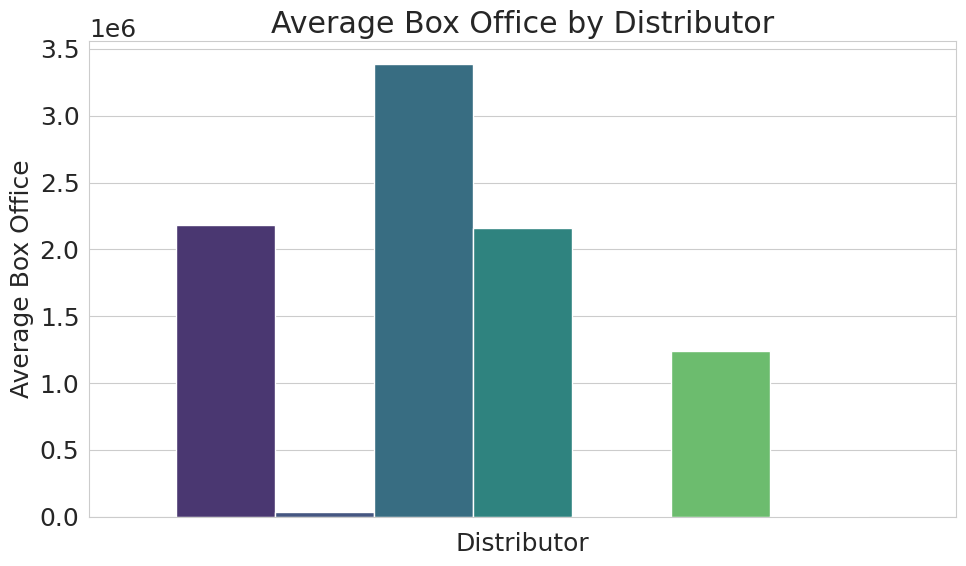

In [36]:
# 해당 결과 시각화
data = pd.DataFrame(list(average_box_off_nums.items()), columns=['Distributor', 'Average Box Office'])

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=data, hue='Distributor', y='Average Box Office', palette='viridis', legend=False)
plt.title('Average Box Office by Distributor')
plt.xlabel('Distributor')
plt.ylabel('Average Box Office')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

barplot으로 시각화한 결과, 차이가 심하므로 다시 상위 4개의 배급사만 선택해 분석대상으로 삼도록 하자.

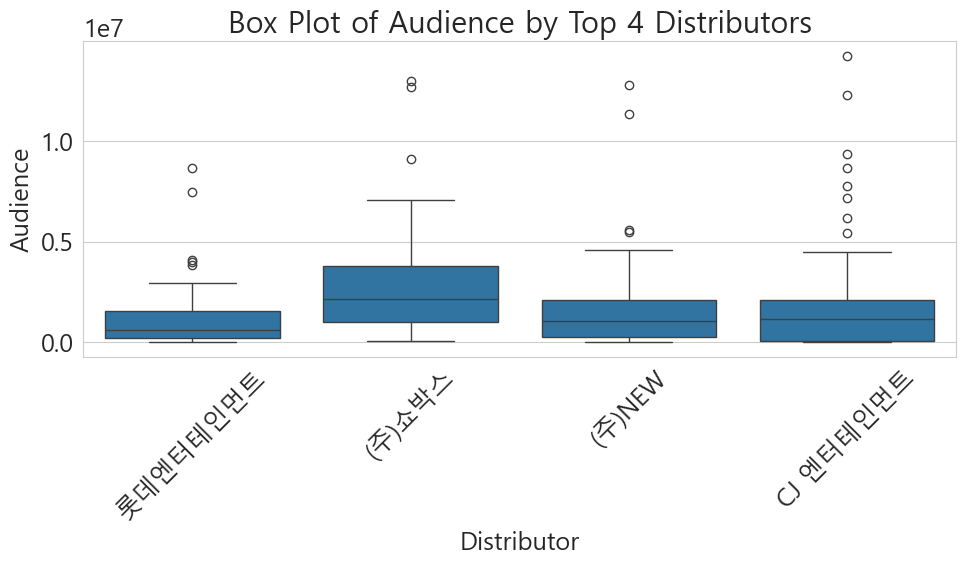

In [74]:
# 관객 수 박스플롯, 바그래프 그리기
# 상위 4개 배급사 선택
top_4_distributors=['(주)NEW','(주)쇼박스','CJ 엔터테인먼트','롯데엔터테인먼트']
# 상위 4개 배급사의 데이터 필터링
top_4_distributors_data = train[train['distributor'].isin(top_4_distributors)]

# 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_4_distributors_data, x='distributor', y='box_off_num')
plt.title('Box Plot of Audience by Top 4 Distributors')
plt.xlabel('Distributor')
plt.ylabel('Audience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-73-1fabf4a07bde>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_4_distributors_data, x='distributor', y='box_off_num', palette='Set2',ci=None)
<ipython-input-73-1fabf4a07bde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_4_distributors_data, x='distributor', y='box_off_num', palette='Set2',ci=None)


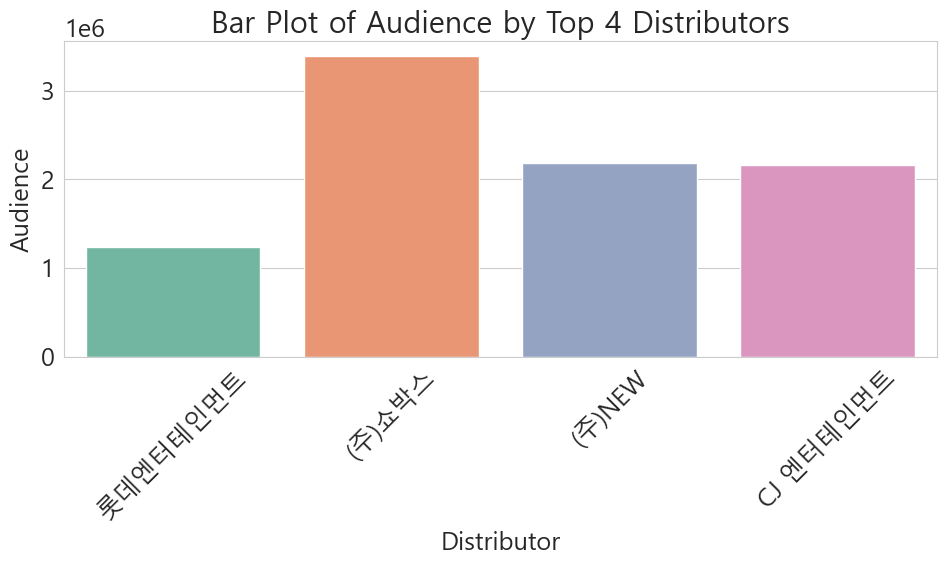

In [73]:
# 바 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=top_4_distributors_data, x='distributor', y='box_off_num', palette='Set2',ci=None)
plt.title('Bar Plot of Audience by Top 4 Distributors')
plt.xlabel('Distributor')
plt.ylabel('Audience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11,autumn
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,autumn
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11,autumn


## 4. 감독의 주 장르에 따른 흥행 분석

흥행 파워가 센 주요 감독들을 대상으로, 감독이 자신의 주 장르로 영화를 만들었을 때와 그렇지 않았을 때를 비교하여 흥행의 정도 차이를 알아본다.

In [40]:
# 감독의 목록 얻기
directors = train['director'].unique()
print("감독의 수:", len(directors))
print("감독 목록:", directors)

감독의 수: 472
감독 목록: ['조병옥' '우민호' '장철수' '구자홍' '신근호' '육상효' '이창재' '임상윤' '정성복' '변성현' '조조 히데오'
 '양병간' '최종태' '한종훈' '윤학렬' '홍상수' '강형철' '린슈유' '부지영' '이재용' '안국진' '동지견' '권칠인'
 '김재한' '손승웅' '류훈' '김철한' '한상희' '장진' '김규민' '최윤석' '김관철' '황인호' '장희선' '김조광수'
 '김기덕' '오멸' '전계수' '최원섭' '민규동' '진승현' '도창훈' '류승완' '전수일' '신연식' '하기호' '최호'
 '방형우' '박용집' '정범식' '김상철' '배성상' '남기웅' '김기영' '곽경택' '김성호' '문인수' '최용석' '이지형'
 '이종필' '손영성' '정기훈' '김인식' '김진민' '이영미' '김희정' '이정범' '손석' '정우철' '박재식' '전형준'
 '김상석' '에밀리오 에스테베즈' '김상만' '김태용' '신수원' '정연식' '지민' '한동호' '손영국' '김동명' '김대우'
 '송해성' '방현준' '소재영' '최시형' '엄태화' '연상호' '김동빈' '김진무' '조근현' '한재림' '임흥순' '김휘'
 '전재홍' '신재영' '김경만' '경순' '타케 마사하루' '신태라' '배창호' '윤종빈' '배광수' '김성수' '박진표'
 '권혁만' '심형래' '오인천' '장희철' '김병준' '양우석' '김덕수' '이재규' '이창규' '구수환' '허은희' '김석윤'
 '고석진' '최경석' '이해준' '하마구치 류스케' '오기환' '홍재희' '조원희' '장훈' '정익환' '박형우' '라희찬'
 '이장호' '이수성' '김정환' '홍석재' '서호빈' '박헌수' '이홍석' '이현철' '박범훈' '박준기' '임진순' '김영탁'
 '이환경' '신춘수' '장성수' '유상헌' '정승구' '박진순' '조성형' '한철수' '김지훈' '지율스님' '문승욱' '이규만'
 '조창호' '박진성' '박석영' '임성구' '김진영' '김회근' '성지혜' '박

In [41]:
# 각 감독이 만든 영화의 장르 수를 계산
director_genre_counts = train.groupby('director')['genre'].nunique()

# 2개 이상의 다른 장르의 영화를 만든 감독을 필터링
directors_with_multiple_genres = director_genre_counts[director_genre_counts >= 2].index.tolist()

# 그 감독들 중 3개 이상의 영화를 만든 감독 필터링
directors_with_multiple_genres_and_3_or_more_movies = [director for director in directors_with_multiple_genres
                                                      if (train['director'] == director).sum() >= 3]

print("3개 이상의 영화를 만들었으며, 2개 이상의 다른 장르의 영화를 만든 감독:")
print(directors_with_multiple_genres_and_3_or_more_movies)

3개 이상의 영화를 만들었으며, 2개 이상의 다른 장르의 영화를 만든 감독:
['권칠인', '김조광수', '김현석', '노진수', '박철수', '신재호', '오멸', '우민호', '윤여창', '장률', '장진']


In [42]:
# 해당 감독 별 평균 관객 수 계산
director_avg_audience = train.groupby('director')['box_off_num'].mean()

# 필터링된 감독들 중 3개 이상의 영화를 만들고, 2개 이상의 다른 장르를 가진 감독의 평균 관객 수
directors_avg_audience_filtered = director_avg_audience[director_avg_audience.index.isin(directors_with_multiple_genres_and_3_or_more_movies)]

# 상위 5명의 감독 선택
top_5_directors = directors_avg_audience_filtered.nlargest(5)

print("상위 5명의 감독:")
print(top_5_directors)

상위 5명의 감독:
director
우민호    2.870138e+06
김현석    1.756984e+06
권칠인    6.145143e+05
장진     5.390357e+05
신재호    1.432052e+05
Name: box_off_num, dtype: float64


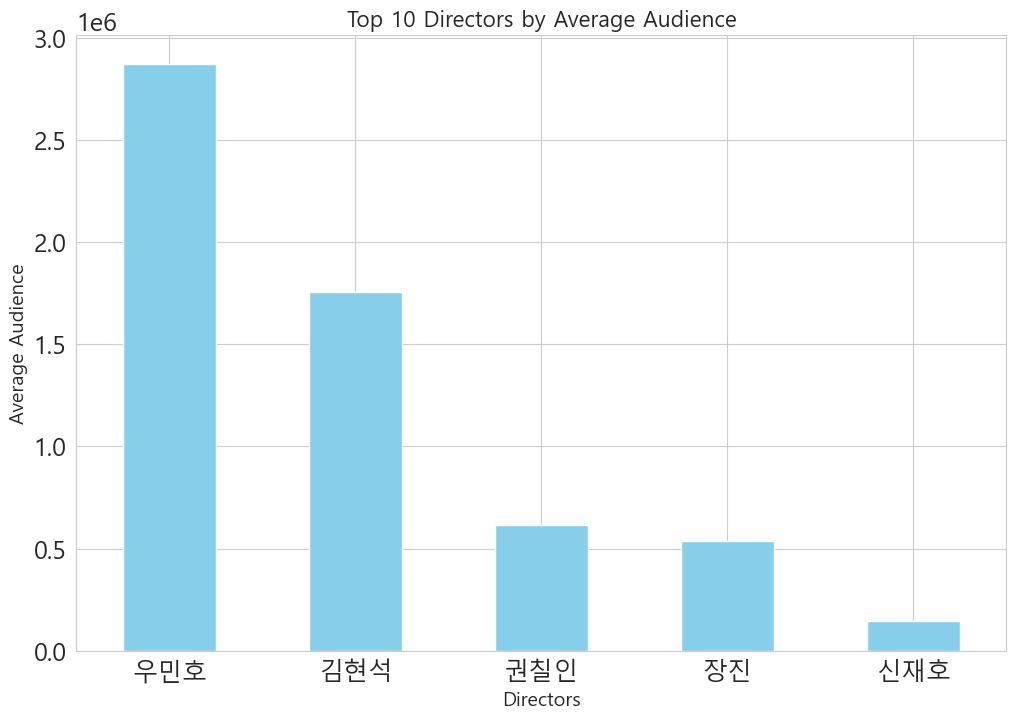

In [72]:
# 시각화
plt.figure(figsize=(12, 8))
top_5_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Average Audience', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Average Audience', fontsize=14)
plt.xticks(rotation=0)  # x축 레이블 표시 X
plt.show()

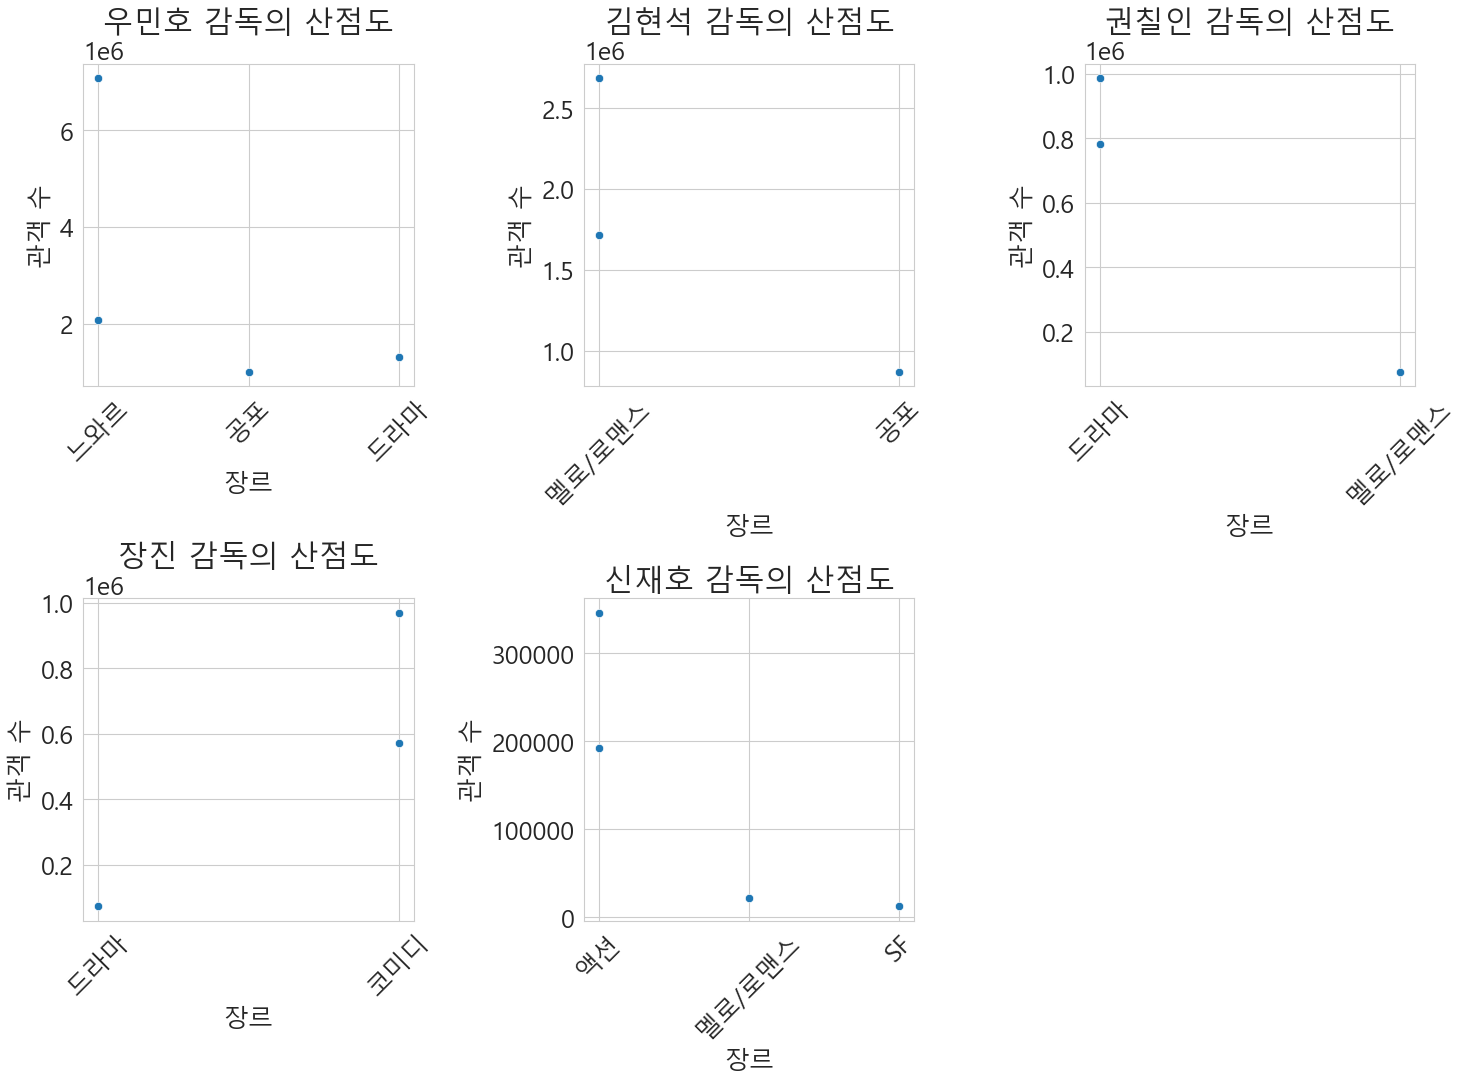

In [71]:
# 각각의 감독에 대한 영화 데이터 추출
directors = ['우민호', '김현석', '권칠인', '장진', '신재호']
movies_data = {}

for director in directors:
    movies_data[director] = train[train['director'] == director]

# 그래프의 행, 열, 위치 지정
plt.figure(figsize=(15, 15))

for i, (director, data) in enumerate(movies_data.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x='genre', y='box_off_num')
    plt.title(f'{director} 감독의 산점도')
    plt.xlabel('장르')
    plt.ylabel('관객 수')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

주로 만드는 장르의 영화의 관객 수가 더 높이 나타나는 것을 파악할 수 있었다.

## 5. 감독의 경험에 따른 스텝 수, 이와 흥행의 관계

감독의 경험이 많을수록 스탭 수가 증가할 것이며, 스탭 수가 많고 감독의 경험이 많을수록 흥행에 성공할 것이라 예측해볼 수 있다. 이가 사실인지 시각화를 통해 알아보자.

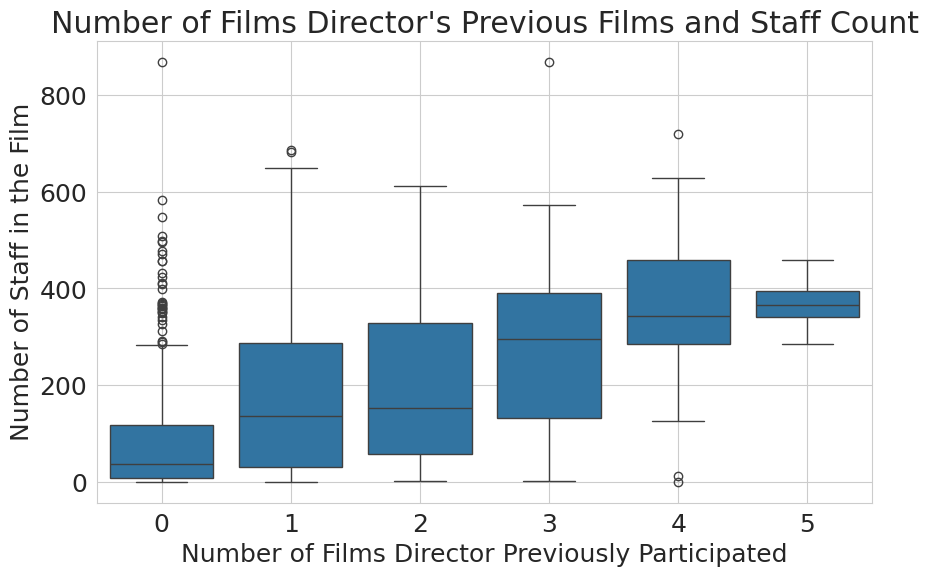

In [45]:
# 박스플롯 그리기
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='dir_prev_num', y='num_staff')
plt.title('Number of Films Director\'s Previous Films and Staff Count')
plt.xlabel('Number of Films Director Previously Participated')
plt.ylabel('Number of Staff in the Film')
plt.grid(True)
plt.show()

감독이 이전에 참여했던 영화가 많을수록 스태프의 수도 늘어나는 것을 확인할 수 있었다.

In [70]:
# 상관계수 계산
corr = train['dir_prev_num'].corr(train['num_staff'])
print('상관계수:', corr)

상관계수: 0.4507062466008549


In [69]:
# 감독의 이전 영화 수와 스태프 수를 기준으로 데이터를 그룹화한 후 각 그룹의 평균 관객 수 파악

# 그룹화 함수
def make_group(data):
  lst=[]

  # outliers 정의
  q1 = data['num_staff'].quantile(0.25)
  q3 = data['num_staff'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data['num_staff'] < lower_bound) | (data['num_staff'] > upper_bound)]['num_staff']

  for i in range(6):  # dir_prev_num이 0부터 5까지 존재
        # 해당 조건에 맞는 데이터 필터링
        filtered_data = data[(data['dir_prev_num'] == i) & (~data['num_staff'].isna())]
        filtered_data = filtered_data[~filtered_data['num_staff'].isin(outliers)]  # 상자그림의 이상치 데이터 제거

        # 데이터프레임이 비어있지 않으면 리스트에 추가
        if not filtered_data.empty:
            lst.append(filtered_data)

  merged_df=pd.concat(lst, ignore_index=True)

  return merged_df

grouped_df= make_group(train)
grouped_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,autumn
1,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526,2013,5,spring
2,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.0,0,3,5,4778,2014,9,autumn
3,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.0,0,138,3,868,2012,3,spring
4,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,0.0,0,0,4,745,2015,7,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,공범,CJ 엔터테인먼트,공포,2013-10-24,95,15세 관람가,국동석,1389992.0,4,281,2,1766285,2013,10,autumn
589,퇴마: 무녀굴,씨네그루(주)키다리이엔티,공포,2015-08-20,105,15세 관람가,김휘,2043525.6,5,360,6,120806,2015,8,summer
590,나의 독재자,롯데엔터테인먼트,드라마,2014-10-30,127,15세 관람가,이해준,604486.0,5,459,2,386074,2014,10,autumn
591,위험한 상견례 2,롯데엔터테인먼트,멜로/로맨스,2015-04-29,119,15세 관람가,김진영,809760.8,5,372,5,472695,2015,4,spring


In [68]:
# 그룹화 된 데이터별로 평균 관객 수 파악

# 경험 0번 감독의 평균 관객 수
df1= grouped_df[grouped_df['dir_prev_num']==0]
mean_df1= df1['box_off_num'].mean()
print("경험 0번 감독의 평균 관객 수: ", mean_df1)

# 경험 1번 감독의 관객 수
df2= grouped_df[grouped_df['dir_prev_num']==1]
mean_df2= df2['box_off_num'].mean()
print("경험 1번 감독의 평균 관객 수: ", mean_df2)

# 경험 2번 감독의 관객 수
df3= grouped_df[grouped_df['dir_prev_num']==2]
mean_df3= df3['box_off_num'].mean()
print("경험 2번 감독의 평균 관객 수: ", mean_df3)

# 경험 3번 감독의 관객 수
df4= grouped_df[grouped_df['dir_prev_num']==3]
mean_df4= df4['box_off_num'].mean()
print("경험 3번 감독의 평균 관객 수: ", mean_df4)

# 경험 4번 감독의 관객 수
df5= grouped_df[grouped_df['dir_prev_num']==4]
mean_df5= df5['box_off_num'].mean()
print("경험 4번 감독의 평균 관객 수: ", mean_df5)

# 경험 5번 감독의 관객 수
df6= grouped_df[grouped_df['dir_prev_num']==5]
mean_df6= df6['box_off_num'].mean()
print("경험 5번 감독의 평균 관객 수: ", mean_df6)

경험 0번 감독의 평균 관객 수:  306913.81762917934
경험 1번 감독의 평균 관객 수:  551163.4036697248
경험 2번 감독의 평균 관객 수:  1414766.941860465
경험 3번 감독의 평균 관객 수:  1230608.6739130435
경험 4번 감독의 평균 관객 수:  2371562.1578947366
경험 5번 감독의 평균 관객 수:  334002.75


감독의 경험과 스태프의 규모를 기반으로 데이터를 그룹화 한 후에, 각 그룹의 평균관객수를 알아보았다.

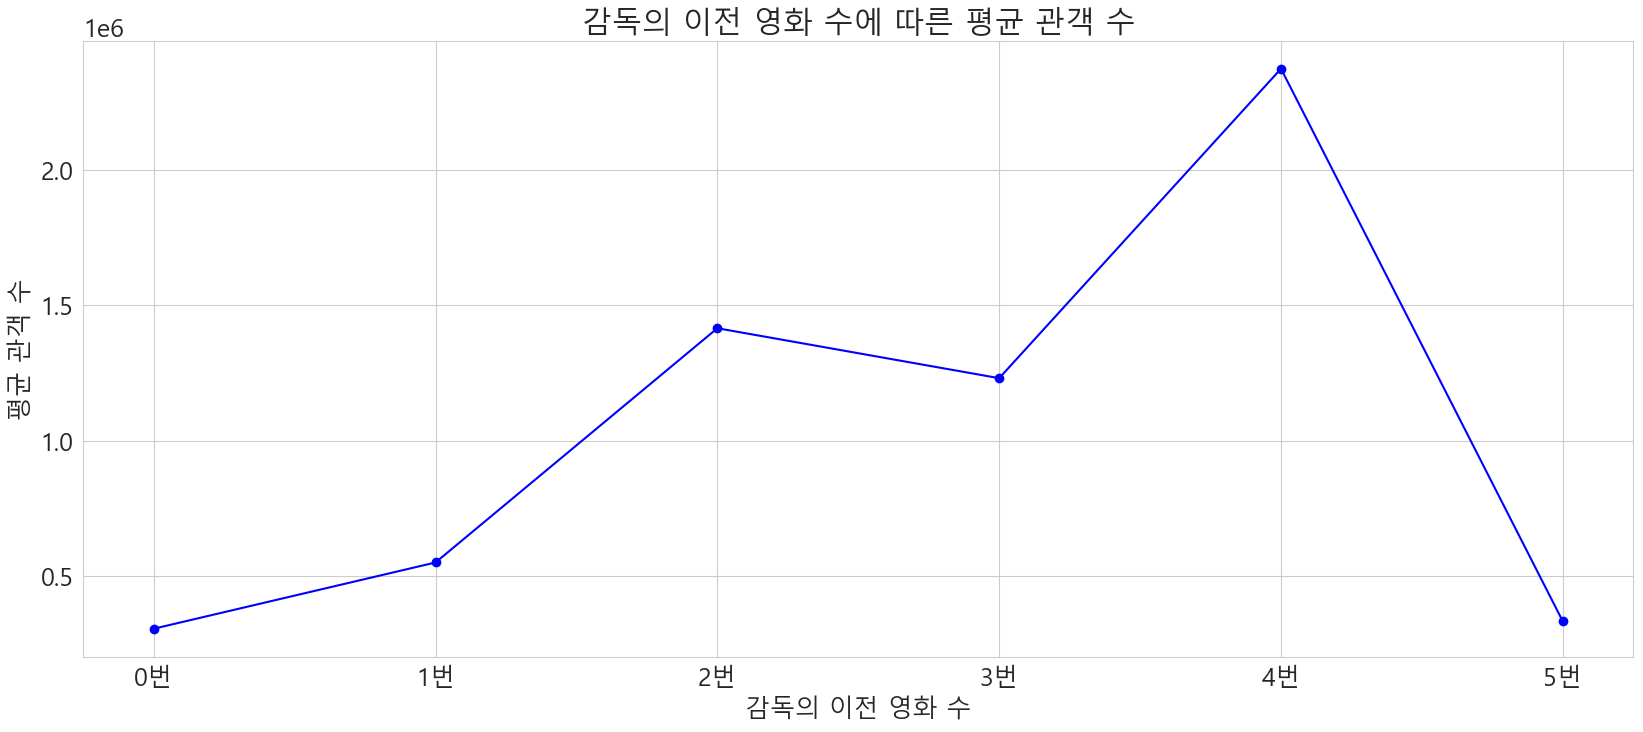

In [67]:
# 시각화

mean_audience = [mean_df1, mean_df2, mean_df3, mean_df4, mean_df5, mean_df6]

# 각 경험을 나타내는 라벨 생성
experience = ['0번', '1번', '2번', '3번', '4번', '5번']

# 선 그래프 생성
plt.plot(experience, mean_audience, marker='o', color='b')

# 그래프에 제목과 레이블 추가
plt.title('감독의 이전 영화 수에 따른 평균 관객 수')
plt.xlabel('감독의 이전 영화 수')
plt.ylabel('평균 관객 수')

# 그래프 표시
plt.show()

In [50]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(329, 15)
(109, 15)
(86, 15)
(46, 15)
(19, 15)
(4, 15)


타 데이터 그룹에 비해, 절대적인 수가 적음을 확인할 수 있었다. (이상치)

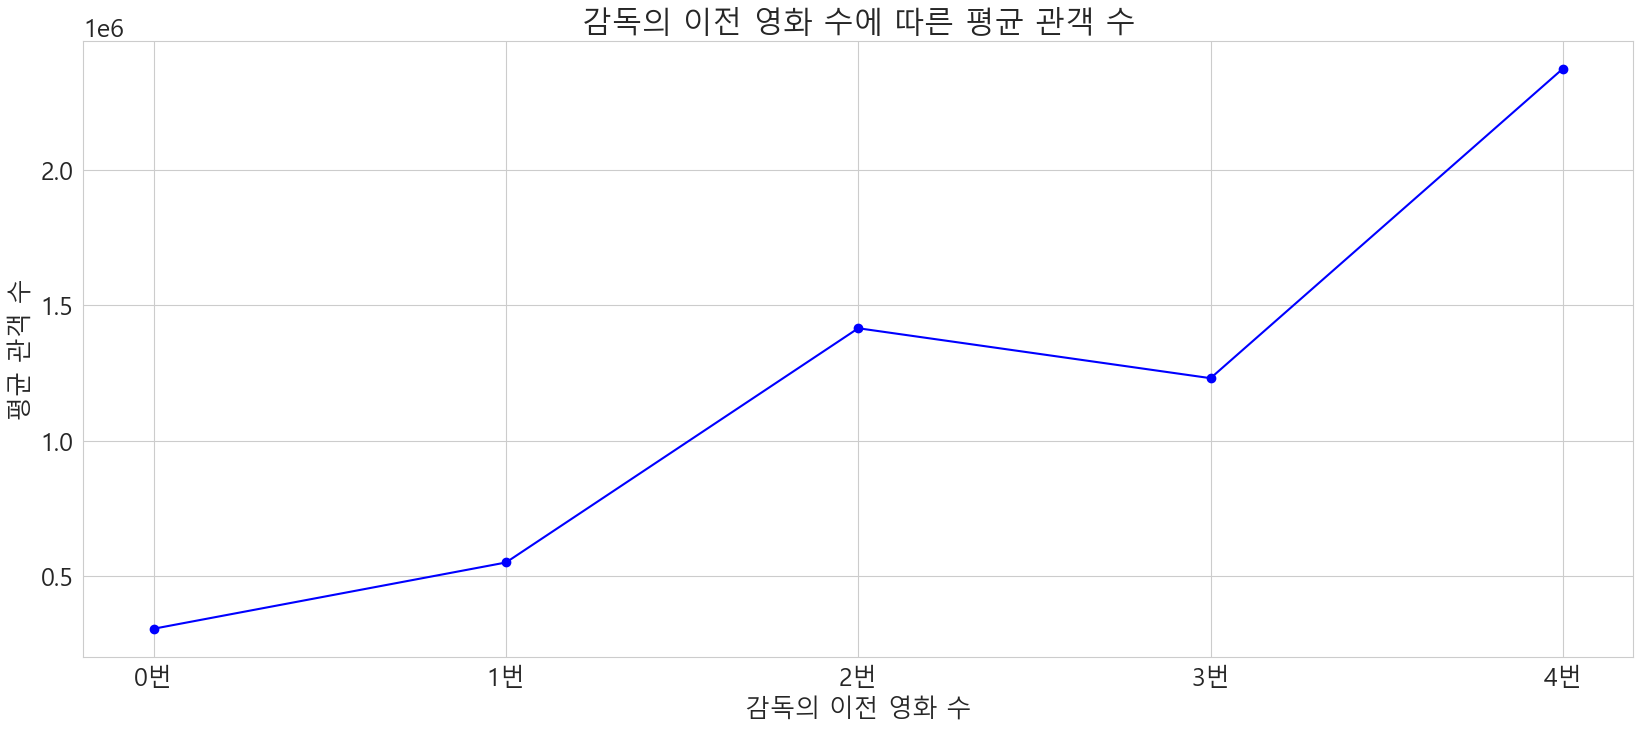

In [66]:
# 시각화

mean_audience = [mean_df1, mean_df2, mean_df3, mean_df4, mean_df5]

# 각 경험을 나타내는 라벨 생성
experience = ['0번', '1번', '2번', '3번', '4번']

# 선 그래프 생성
plt.plot(experience, mean_audience, marker='o', color='b')

# 그래프에 제목과 레이블 추가
plt.title('감독의 이전 영화 수에 따른 평균 관객 수')
plt.xlabel('감독의 이전 영화 수')
plt.ylabel('평균 관객 수')

# 그래프 표시
plt.show()

따라서 데이터의 수가 절대적으로 적은 df6을 제외하고 다시 시각화해본 결과, 감독의 경험이 많을수록 관객 수가 증가함을 파악할 수 있었다.

결론적으로, 감독의 경험이 많을 수록 스태프 수도 증가하는 추세를 보이며, 감독의 경험이 많고 규모가 큰 영화일수록 관객 수도 증가함을 알 수 있었다.

## 6. 상영등급 별 개봉 시기 관계

영화의 상영등급 별로 개봉시기를 다르게 할 것이라고 예상할 수 있다. 이가 사실일지 알아보자.

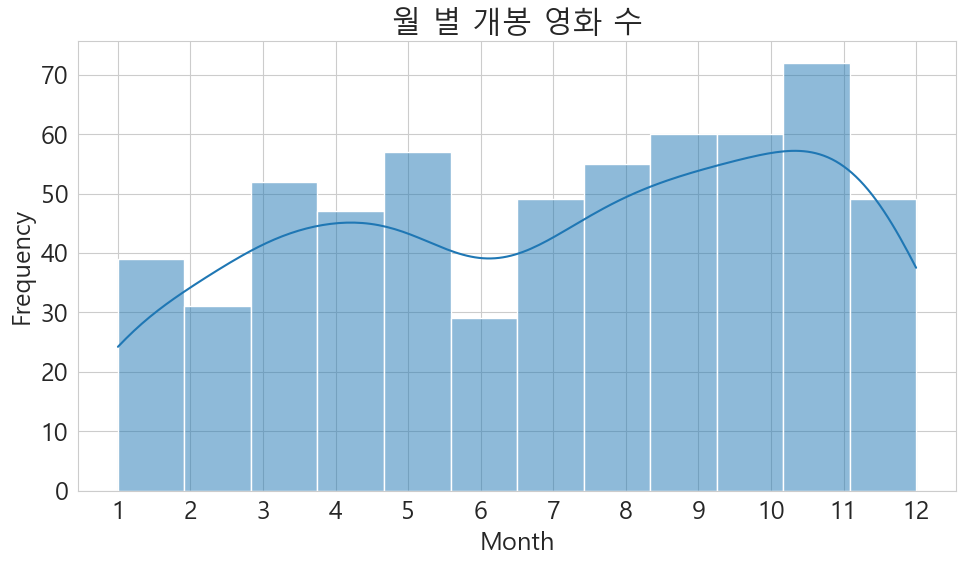

In [65]:
# 월 별 개봉 영화 수
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='month', bins=12, kde=True)
plt.title('월 별 개봉 영화 수')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))  # x축 눈금을 1부터 12까지 설정하여 월을 표시
plt.tight_layout()
plt.show()

전체적으로 월별 개봉영화 수를 살펴본 결과, 6월에 개봉 영화 수가 감소하고, 봄과 가을에 많이 개봉하는 것을 알 수 있었다.

상영등급별로 개봉 시기를 더 자세히 살펴보기 위해 개별로 그래프를 그려보겠다.

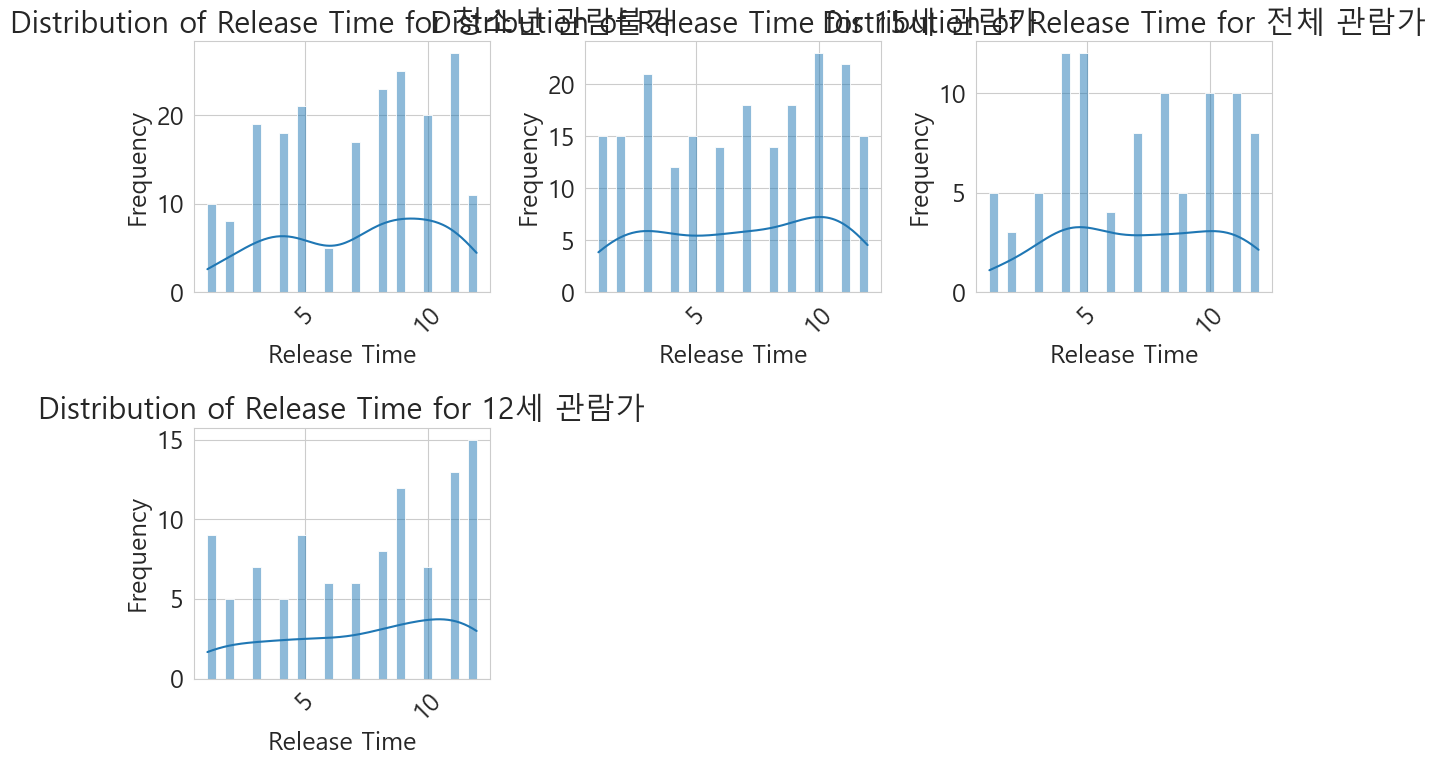

In [62]:
# 상영등급별로 개별 히스토그램 그리기
plt.figure(figsize=(12, 8))
for i, rating in enumerate(train['screening_rat'].unique(), 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=train[train['screening_rat'] == rating], x='month', bins=30, kde=True)
    plt.title(f'Distribution of Release Time for {rating}')
    plt.xlabel('Release Time')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # x축 눈금을 45도로 회전하여 겹치지 않게 설정

plt.tight_layout()
plt.show()

전체 관람가 영화는 어린이 날이 있는 봄에 많이 개봉하고, 청소년 관람불가 영화는 6월에 거의 개봉하지 않으며, 12세 관람가 영화는 연말에, 15세 관람가 영화는 3월과 10월에 개봉이 잦음을 알 수 있었다.

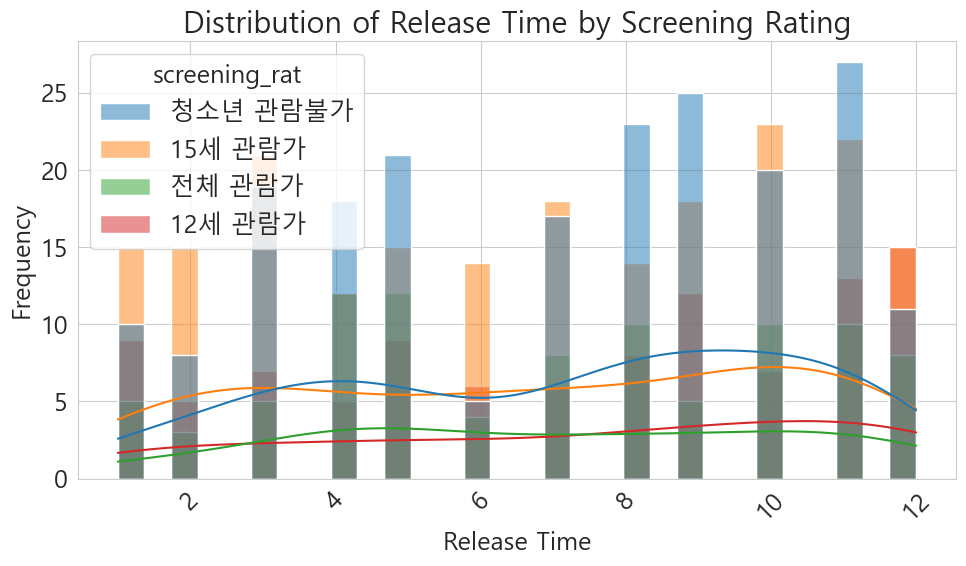

In [61]:
# 상영등급 별 개봉 시기 한 번에 시각화
# 히스토그램

plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='month', hue='screening_rat', bins=30, kde=True)
plt.title('Distribution of Release Time by Screening Rating')
plt.xlabel('Release Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 눈금을 45도로 회전하여 겹치지 않게 설정
plt.tight_layout()
plt.show()

다음과 같이 한 그래프로 그려봄으로써 청소년 관람불가 영화는 4월, 5월, 8월, 9월 11월에 다른 영화들에 비해 많이 개봉하는 것을 알 수 있었고, 15세 관람가 영화는 1월, 2월, 6월 (방학시즌)에 많이 개봉하는 것을 알 수 있었다.

따라서 영화 상영등급 별로 개봉시기에 차이가 존재함을 파악할 수 있었다.

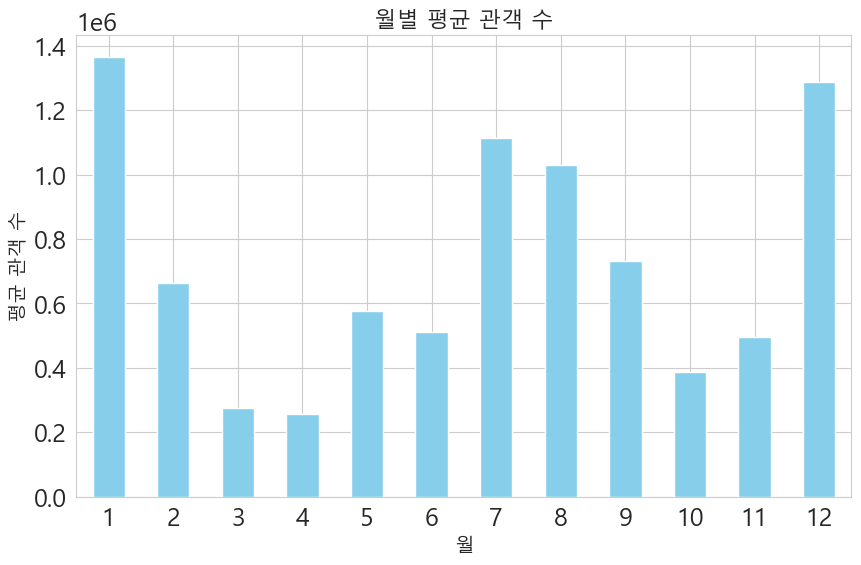

In [60]:
# 월별 평균 관객 수 계산
monthly_average_audience = train.groupby('month')['box_off_num'].mean()

# 시각화
plt.figure(figsize=(10, 6))
monthly_average_audience.plot(kind='bar', color='skyblue')
plt.title('월별 평균 관객 수', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('평균 관객 수', fontsize=14)
plt.xticks(rotation=0)  # x축 레이블 회전 없이 표시
plt.show()

추가적으로, 연말연초는 개봉 영화 수가 적은데 비해 관람객 수가 많으므로 연말에 개봉한다면 높은 수익을 올릴 수 있을 것이라고 예측할 수 있다.

## 7. 장르별 영화 러닝타임의 평균

In [56]:
train[['genre','time']].groupby('genre').mean().sort_values('time')

,time
genre,
애니메이션,82.571429
다큐멘터리,88.053763
멜로/로맨스,96.641026
공포,100.214286
SF,101.384615
미스터리,102.588235
드라마,104.651584
코미디,105.264151
뮤지컬,107.000000


<Axes: xlabel='genre'>

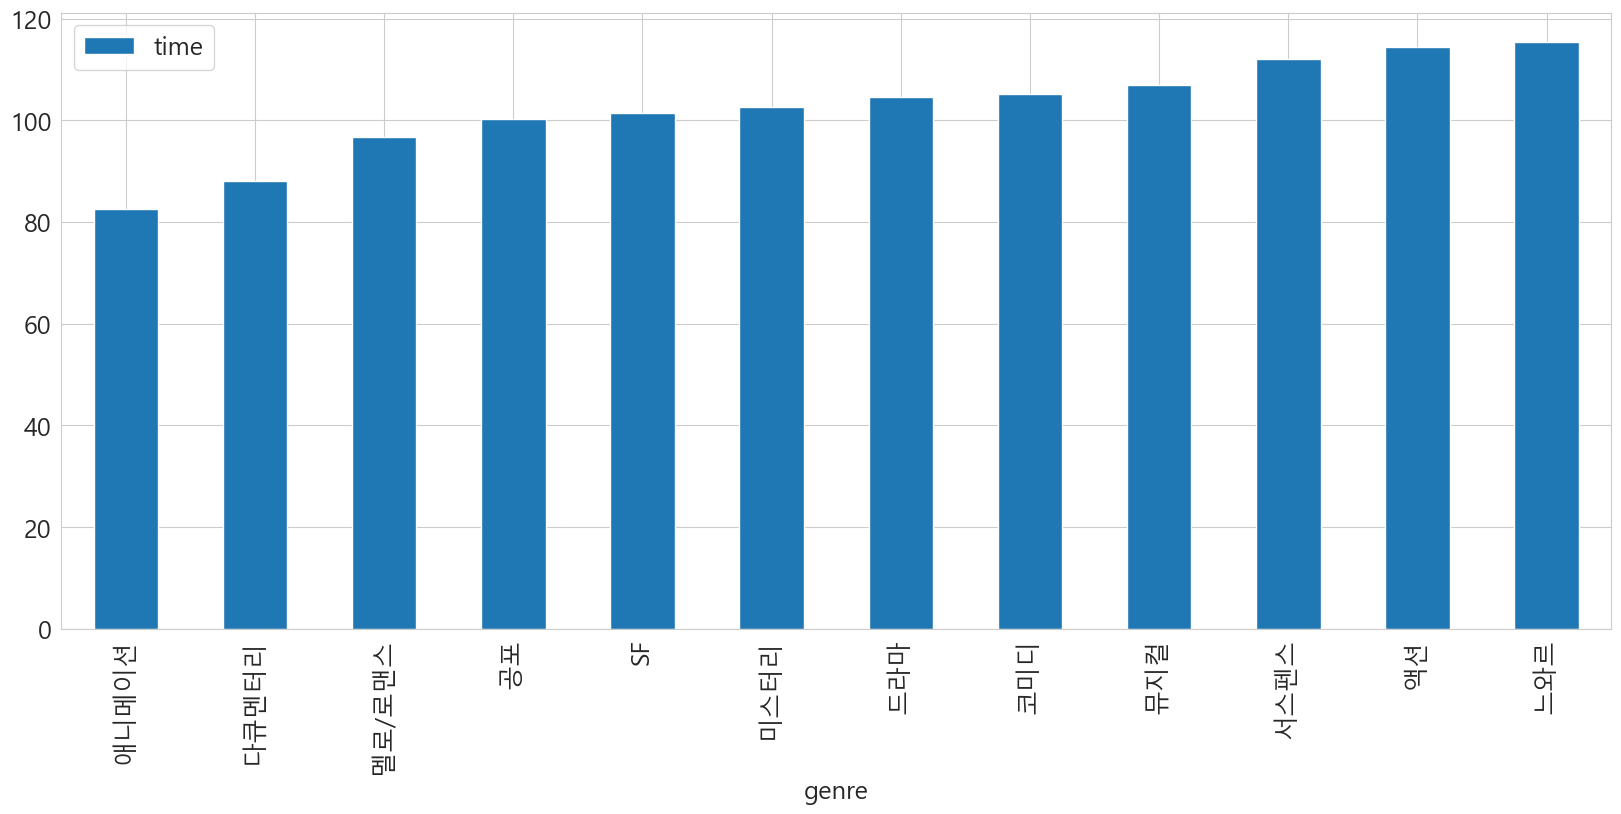

In [76]:
train[['genre','time']].groupby('genre').mean().sort_values('time').plot(kind='bar')

(영화 제목 길이와 관객 수)

<Axes: xlabel='title_length'>

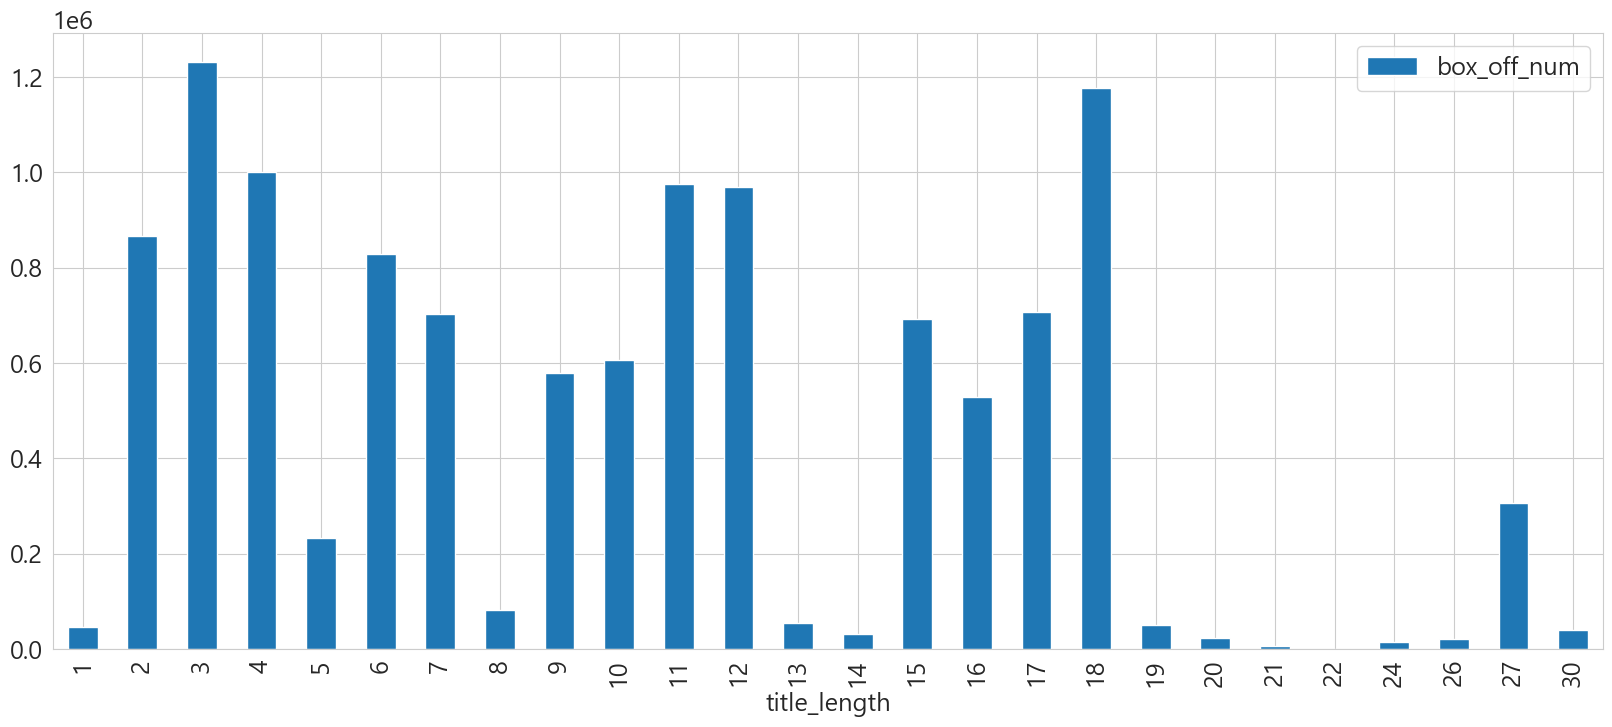

In [86]:
train['title_length'] = train['title'].apply(len)
train[['title_length','box_off_num']].groupby('title_length').mean().sort_values('title_length').plot(kind='bar')

<Axes: xlabel='length'>

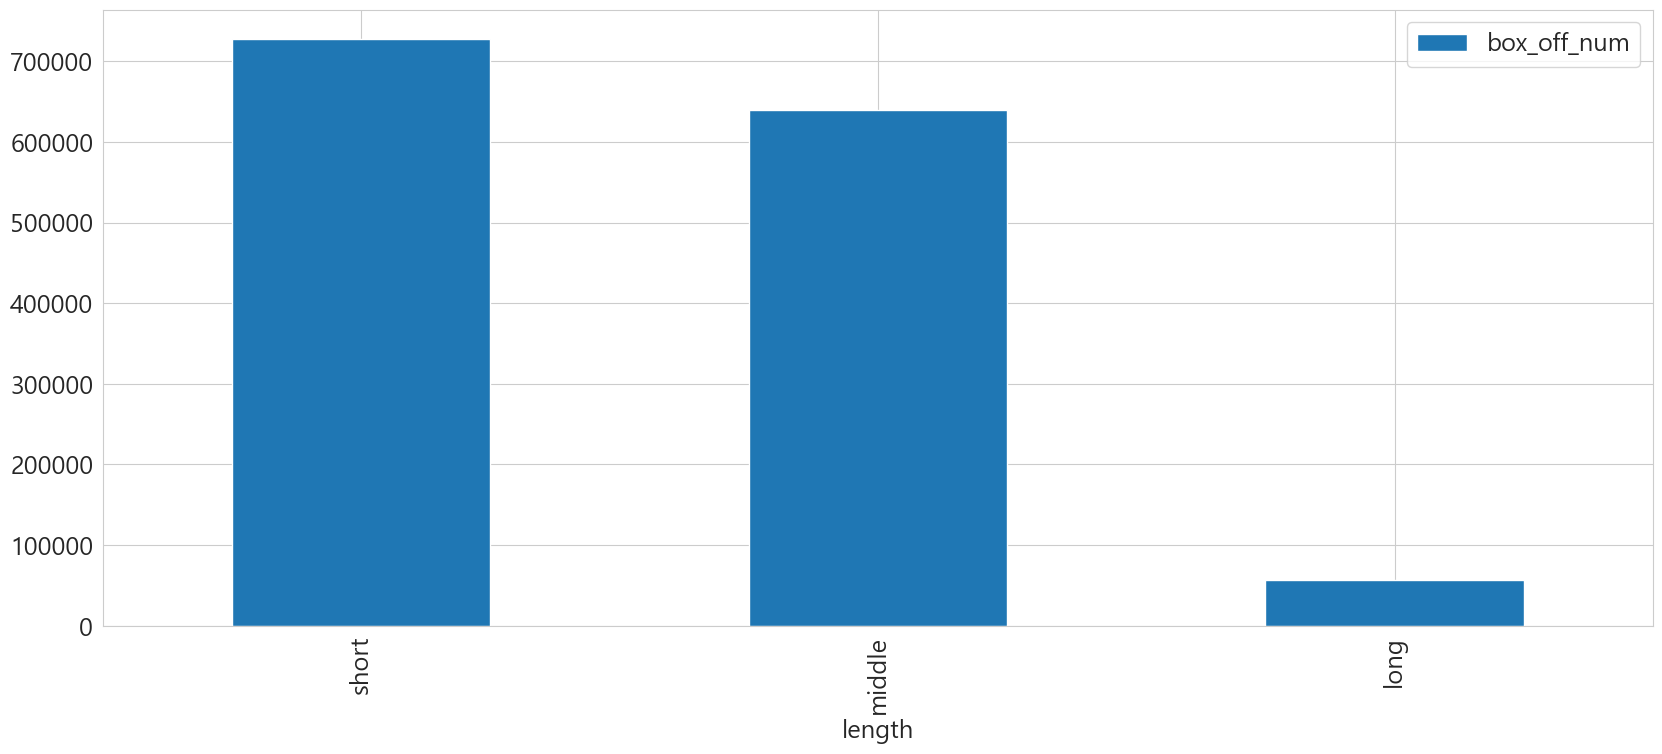

In [95]:
train['length'] = pd.cut(train['title_length'], bins=[ 0,10, 20, float('inf')], labels=['short', 'middle', 'long'])
train[['length','box_off_num']].groupby('length').mean().sort_values('length',ascending=True).plot(kind='bar')

## 8. 연도별 흥행 장르

In [79]:
df = train.groupby(['year', 'genre']).size().unstack(fill_value=0)
df

genre,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
year,,,,,,,,,,,,
2010,1,9,5,14,36,11,0,0,0,0,2,12
2011,3,3,2,13,31,7,2,1,0,6,7,5
2012,1,3,4,13,35,9,0,4,0,2,5,12
2013,2,8,4,15,36,12,1,5,1,1,6,4
2014,2,8,5,23,47,18,1,3,1,7,1,11
2015,4,11,7,15,36,21,1,4,0,5,7,9


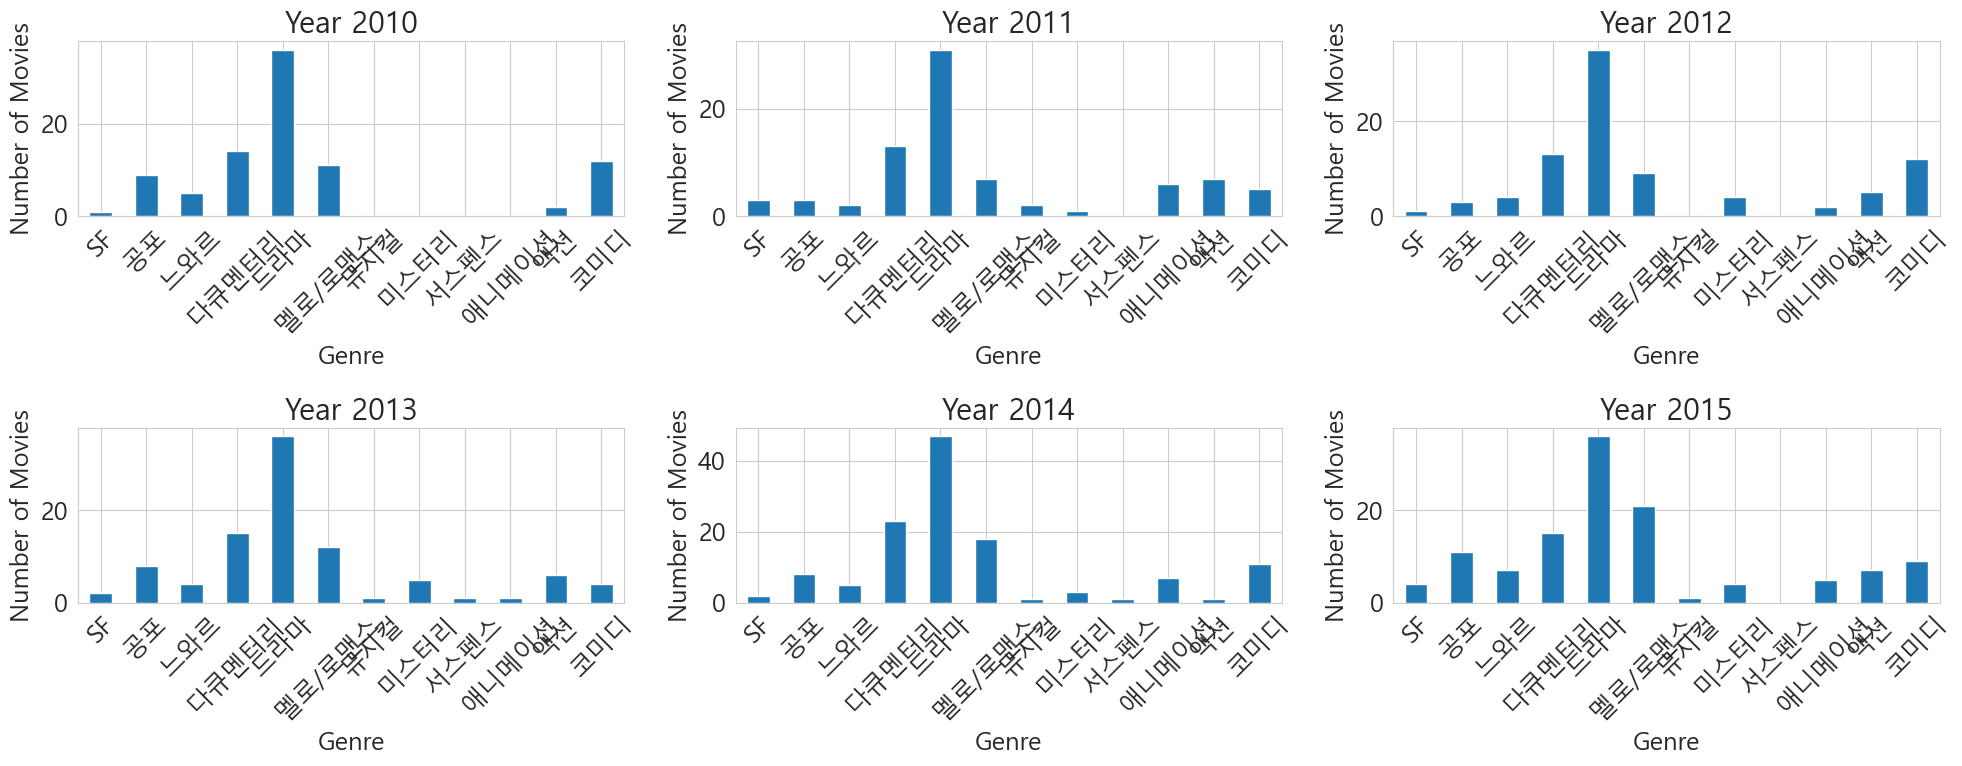

In [80]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, (year, data) in enumerate(df.iterrows()):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    data.plot(kind='bar', ax=ax, title=f'Year {year}', xlabel='Genre', ylabel='Number of Movies')
    ax.set_xticklabels(data.index, rotation=45)
    ax.legend().remove()

plt.tight_layout()
plt.show()

### 9. 상위 7개 배급사 별 스텝의 평균 수,그리고 상영 영화 수와의 관계

배급사별 흥행성적 분석에서 찾아낸 상위 7개의 배급사에 대해
배급사별 스텝의 평균 수를 알아보자.

상위 7개 배급사 = {'(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스, 'CJ 엔터테인먼트','골든타이드픽처스', '롯데엔터테인먼트','인디스토리'}

In [81]:
#상위 7개 배급사 별 스텝의 평균 수,그리고 상영 영화 수와의 관계
top7_distributors = ['(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스', 'CJ 엔터테인먼트', '골든타이드픽처스', '롯데엔터테인먼트', '인디스토리']

filtered_data = train[train['distributor'].isin(top7_distributors)]
staff_per_distributor = filtered_data.groupby('distributor')['num_staff'].mean().sort_values()
print(staff_per_distributor )

distributor
인디스토리         40.500000
(주)마운틴픽쳐스     48.965517
골든타이드픽처스      51.733333
(주)NEW       277.266667
롯데엔터테인먼트     312.000000
CJ 엔터테인먼트    313.629630
(주)쇼박스       360.384615
Name: num_staff, dtype: float64


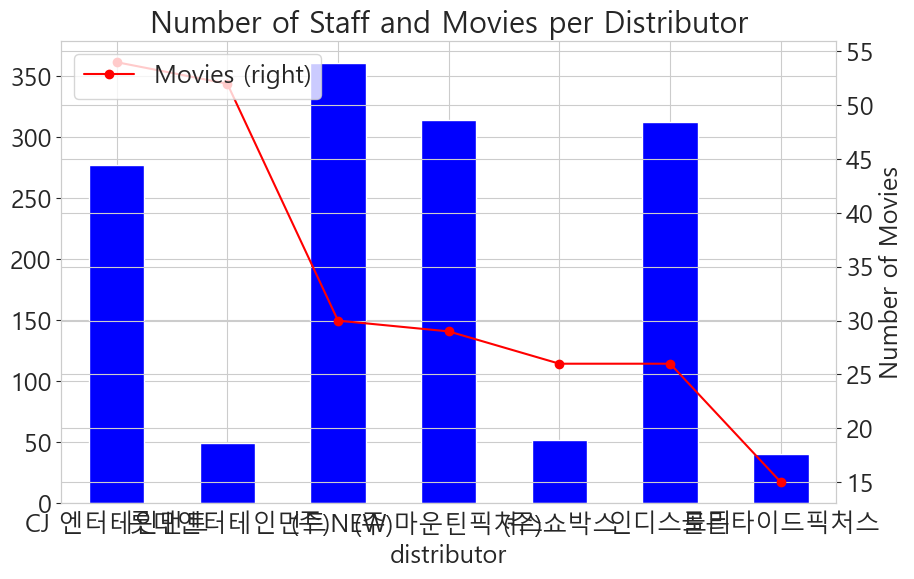

In [82]:
import matplotlib.pyplot as plt

# 배급사별 스텝수 및 배급사별 영화 수 계산
staff_per_distributor = filtered_data.groupby('distributor')['num_staff'].mean()
movies_per_distributor = filtered_data['distributor'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 스텝수 막대 그래프 그리기
staff_per_distributor.plot(kind='bar', color='blue', label='Staff')

# 영화 수 선 그래프 그리기
movies_per_distributor.plot(secondary_y=True, color='red', marker='o', linestyle='-', label='Movies')

plt.title('Number of Staff and Movies per Distributor')
plt.xlabel('Distributor')
plt.ylabel('Number of Staff')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### 10. 상위 7개 배급사 별 배우의 평균 수,그리고 상영 영화 수와의 관계

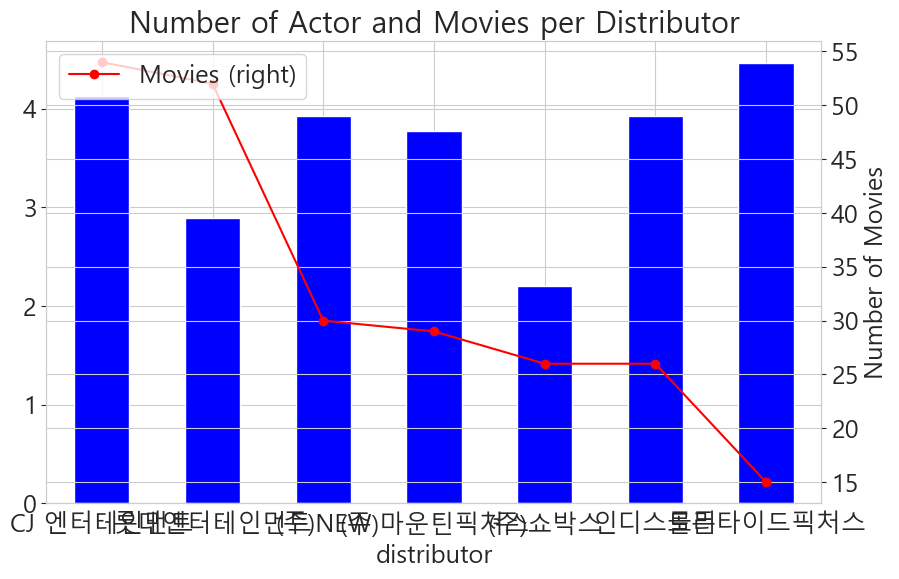

In [83]:
# 배급사별 주연수 계산
actor_per_distributor = filtered_data.groupby('distributor')['num_actor'].mean()
movies_per_distributor = filtered_data['distributor'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 스텝수 막대 그래프 그리기
actor_per_distributor.plot(kind='bar', color='blue', label='Staff')

# 영화 수 선 그래프 그리기
movies_per_distributor.plot(secondary_y=True, color='red', marker='o', linestyle='-', label='Movies')

plt.title('Number of Actor and Movies per Distributor')
plt.xlabel('Distributor')
plt.ylabel('Number of Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

### 11. 상영등급에 따른 상영시간

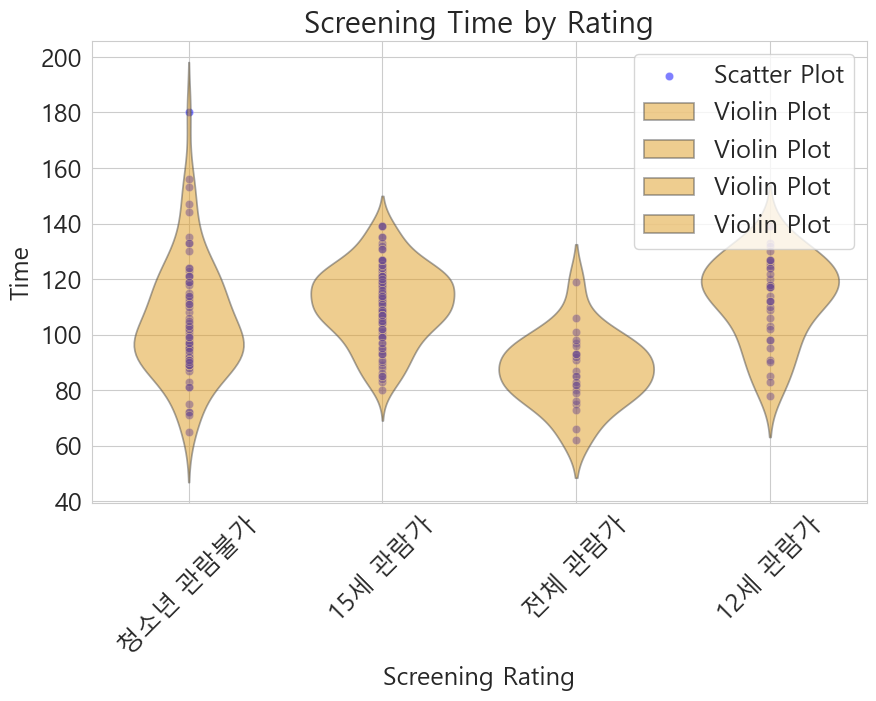

In [84]:
data = filtered_data[['screening_rat', 'time']]

# Scatter plot 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='screening_rat', y='time', data=data, alpha=0.5, color='blue', label='Scatter Plot')

# Violin plot 그리기
sns.violinplot(x='screening_rat', y='time', data=data, inner=None, color='orange', alpha=0.5, label='Violin Plot')

plt.title('Screening Time by Rating')
plt.xlabel('Screening Rating')
plt.ylabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()